<a href="https://colab.research.google.com/github/DaikhaChabane/machine-learning/blob/master/Kmeans_CAH_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://upload.wikimedia.org/wikipedia/fr/b/ba/UPEC-logo.svg" align="center" hspace="500px" vspace="20px"></p>

<h1 align="center"><b>Rapport du projet Apprentissage artificielle </b></h1> 

<h1 align="center">Implémentation du clustering des fleurs d’Iris. </h1>

<h1>Avec les algorithme 
<li>K-Means.
<li>CAH  
<li>GMM.<h1>

Réaliser par :

AISSANI Amina.<br>
Boudar Ahmed.<br>
DAIKHA Chabane


##Implémentation de Kmeans

Définition :

Importation des librairies et chargement des données.

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#chargement des données
df=pd.read_csv('iris.csv')
print(type(df))

Affichage des données, pour mieux comprendre le jeu de données.


In [0]:
print("Affichier le debut de la liste\n",df.head())

print("\nLes informations\n",df.info)

print("\nDimension des données\n",df.shape)

print("\nStatistiques descriptives\n",df.describe())

print("\nles groupes \n",df.groupby('Species').size())

print("\nles columns\n", df.columns)


Vérifier s'il y a une incohérence dans l'ensemble de données comme, il n'y a pas de valeurs nulles dans l'ensemble de données, donc les données peuvent être traitées.

In [0]:
df.info()

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 2
Data columns (total 4 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
dtypes: float64(4)
memory usage: 5.9 KB
```



Fractionner les données en deux tableaux X :  fonctionnalités et y : étiquettes.

In [0]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values
y = df['Species'].values

# Deuxiéme Methode en Utilisant iloc
# x = df.iloc[:,[1,2,3,4]].values
# y = df.iloc[:,-1]

Transformer la sortie Species en numérique :
  0 : Iris setosa,
  1 : Iris versicolor,
  2 : Iris virginica.

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(set(y.tolist()))

{0, 1, 2}


Centrage réduction des données:

pour éviter que variables à forte variance pèsent indûment sur les résultats

In [0]:
from sklearn import preprocessing
X = preprocessing.scale(X)

Pour le choix d'un nombre optimal de clusters,On s'est basé sur deux méthode du calcul :
intertie et la silhouette.

Premiere Methode : inertie.

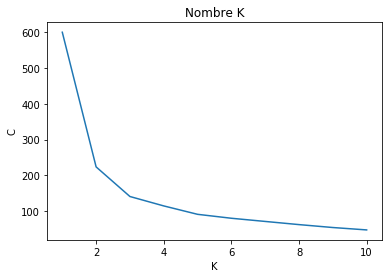

In [0]:
from sklearn.cluster import KMeans
c = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300 ,n_init=10, random_state=0)
    kmeans.fit(X)
    c.append(kmeans.inertia_)

# Graphe
plt.plot(range(1, 11), c)
plt.title('Nombre K')
plt.xlabel('K')
plt.ylabel('C') 
plt.show()


Deuxieme Methode : silhouette.
Le tracé de silhouette affiche une mesure de la proximité de chaque point d'un cluster avec les points des clusters voisins et fournit ainsi un moyen d'évaluer visuellement des paramètres tels que le nombre de clusters. Cette mesure a une plage de [-1, 1].

In [0]:
from sklearn import metrics

#utilisation de la métrique "silhouette" pour faire varier le nombre de clusters de 2 à 10
d = np.arange(11,dtype="double")
for k in np.arange(11):
 km = KMeans(n_clusters=k+2)
 km.fit(X)
 d[k] = metrics.silhouette_score(X,km.labels_)
print(d)

#graphique
#justification du choix de la silhouette
plt.title("Silhouette")
plt.xlabel("nb of clusters")
plt.plot(np.arange(2,13,1),d)
plt.show()

Selon les deux methodes le nombre optimal de clusters est le point représentant le coude. Ici le coude peut être représenté par K valant 3 ou 4.
Nous prenons le nombre opimale de clusters = 3 et nous passons a l'application du modele.

In [0]:
#On spécifie le paramètre init=k-means++, qui sélectionne les centres de cluster initiaux pour le clustering k-mean de 
#manière intelligente pour accélérer la convergence. 
#n_init=10 par défaut  :Nombre de fois que l'algorithme k-means sera exécuté avec différentes graines de centroïde. 
#max_iter =300 par défaut: Nombre maximal d'itérations de l'algorithme k-means pour une seule exécution.

km = KMeans(n_clusters= 3, max_iter= 100, n_init=10, random_state=0)
ypred = km.fit_predict(X)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [0]:
import seaborn as sns
score1 = metrics.silhouette_score(X, ypred)
print(score1)

from sklearn.metrics.cluster import adjusted_rand_score

score2 = adjusted_rand_score(y, ypred)
print(score2)


0.4589717867018717
0.6201351808870379


# Nouvelle section

##Implémentation de CAH

Définition:

Importer les librairies necessaires 

In [0]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch


Générer la matrice des distance 

In [0]:

#générer la matrice des liens
a = linkage(X,method='ward',metric='euclidean')

Affichage du dendrogramme.

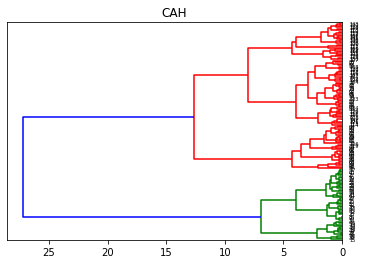

In [0]:
#affichage du dendrogramme
plt.title("CAH")
dendrogram(a,labels=df.index,orientation='left' ,color_threshold=12)
plt.show()

Découpage à t = 12 identifiants de 3 groupes

In [0]:
groupes_cah = sch.fcluster(a,t=12,criterion='distance') 
print(np.unique(groupes_cah).size, "groupes constitués")

3 groupes constitués


In [0]:
score3 = adjusted_rand_score(y, groupes_cah)
print(score3)

0.615322993214545


Comparaison entre Kmeans et CAH.

In [0]:

pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
1,17,0,0,0,13,0,19,0,0,0
2,1,0,0,21,0,0,0,0,0,8
3,0,17,18,0,0,9,0,12,3,12


##Implémentation de GMM

Définitions : 

Importation des librairies.

In [0]:
from sklearn.mixture import GaussianMixture


Application de modeles

In [0]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

ypred2 = gmm.predict(X)
ypred2



Evaluation 

In [0]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y, ypred2)
score

0.9038742317748124


**Conclusion **
On comparons et on analysons les résultats des scores donnés par le métrique "adjusted rand score" on conclue que l'algorithme GMM donne des meilleurs résultats que le modèle k-means et CAH.